>>>>>>>>>>
当前可用资金 100.0
<<<<<<<<<<<<<



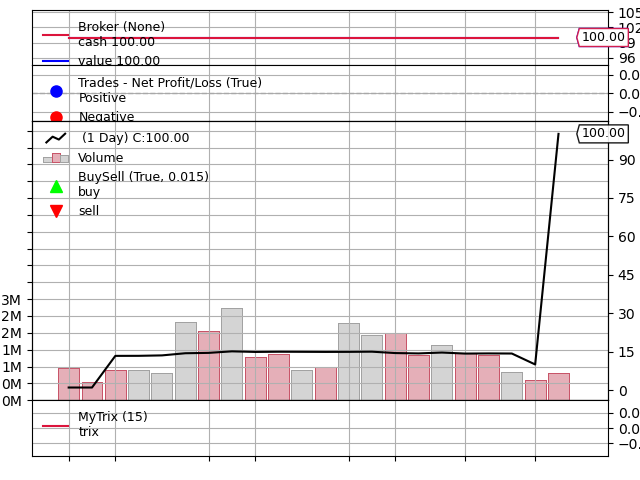

[[<Figure size 640x480 with 5 Axes>]]

In [2]:
# 从未来导入绝对导入，除法，打印功能，unicode_literals
from __future__ import (absolute_import, division, print_function, unicode_literals)
import backtrader as bt
import pandas as pd
from datetime import datetime
from colorama import Fore, Back, Style
import sys
from pprint import pprint
from indicators.indicator_goodday import *

# import method from sibling
# module
sys.path.append("..")
from tools.debuger import *
from indicators.mytrix import MyTrix
from TestStrategy import TestStrategy
from NoStrategy import NoStrategy

 
 

cerebro = bt.Cerebro()

# 增加一个策略
cerebro.addstrategy(TestStrategy,trixperiod=11)
# cerebro.addstrategy(NoStrategy, trixperiod=15)

#获取数据
stock_hfq_df = pd.read_csv("./sh600000.csv",index_col='date',parse_dates=True)
start_date = datetime(2019, 8, 1)  # 回测开始时间
end_date = datetime(2019, 8, 30)  # 回测结束时间
data = bt.feeds.PandasData(dataname=stock_hfq_df, fromdate=start_date, todate=end_date)  # 加载数据
cerebro.adddata(data)  # 将数据传入回测系统

cerebro.broker.setcash(100)
cerebro.run()
# print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

print(Fore.RED + '>>>>>>>>>>')
print('当前可用资金', cerebro.broker.getcash())
# print('当前总资产', cerebro.broker.getvalue())
# print('当前持仓量', cerebro.broker.getposition(cerebro.data).size)
# print('当前持仓成本', cerebro.broker.getposition(cerebro.data).price)
print(Fore.RED + '<<<<<<<<<<<<<')
print(Style.RESET_ALL)

# print  python version
 
%matplotlib widget 
cerebro.plot(iplot=False)


